In [1]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
fin_v='https://finviz.com/quote.ashx?t='


In [4]:
fin_v='https://finviz.com/quote.ashx?t='
tkicker = ['amzn','amd','goog','fb']
news_tables={}
for tk in tkicker:
    urls = fin_v+tk
    req = Request(url=urls,headers={'user-agent':'my-app'})
    response = urlopen(req)
    html = BeautifulSoup(response,"html")
    news_table = html.find(id="news-table")
    news_tables[tk] =news_table 
    
amzn_data = news_tables['amzn']
amzn_rows = amzn_data.findAll('tr')

In [5]:
for index, row in enumerate(amzn_rows):
    title = row.a.text
    timestamp = row.td.text
    print(timestamp + " " + title)

Jul-10-21 12:35AM   The Pentagon's JEDI Contract Is Dead -- but It Will Return
Jul-09-21 10:49PM   China Watchdog Rejects Tencent-Led Game Streaming Deal
07:10PM   FTC extends probe of Amazon, MGM deal - source
06:48PM   FTC extends probe of Amazon, MGM deal - source
04:59PM   This week in Bidenomics
04:46PM   Amazon and Facebook are unnamed targets of Bidens executive order
04:37PM   Oracle Stock Soared to a New High on Speculation About Defense Cloud Contract
04:21PM   'You really need Congress and you need legislation to really bring about meaningful change in antitrust policy': Insigneo Chief Investment Strategist
03:42PM   Tech Deals, Data Come Under Fire in Bidens Sweeping Order
03:24PM   How Jeff Bezos Became the Worlds Richest Man
03:04PM   Amazon scoops Tesco veteran to run bricks-and-mortar stores
02:30PM   Amazon is Yahoo Finance Plus investment idea of the day
02:27PM   Is Snowflake Stock A Buy? Software Maker Sets Path To $10 Billion In Revenue By 2028
02:24PM   Does Etsy'

In [6]:
parsed_data=[]
for tkicker, news_table in news_tables.items():
    
    for row in news_table.findAll('tr'):
        title = row.a.text
        date_data = row.td.text.split(" ")
        if len(date_data)==1:
            time = date_data[0]
        else:
            date = date_data[0]
            time = date_data[1]
        parsed_data.append([tkicker,date,time,title])
print(parsed_data)

[['amzn', 'Jul-10-21', '12:35AM\xa0\xa0', "The Pentagon's JEDI Contract Is Dead -- but It Will Return"], ['amzn', 'Jul-09-21', '10:49PM\xa0\xa0', 'China Watchdog Rejects Tencent-Led Game Streaming Deal'], ['amzn', 'Jul-09-21', '07:10PM\xa0\xa0', 'FTC extends probe of Amazon, MGM deal - source'], ['amzn', 'Jul-09-21', '06:48PM\xa0\xa0', 'FTC extends probe of Amazon, MGM deal - source'], ['amzn', 'Jul-09-21', '04:59PM\xa0\xa0', 'This week in Bidenomics'], ['amzn', 'Jul-09-21', '04:46PM\xa0\xa0', 'Amazon and Facebook are unnamed targets of Bidens executive order'], ['amzn', 'Jul-09-21', '04:37PM\xa0\xa0', 'Oracle Stock Soared to a New High on Speculation About Defense Cloud Contract'], ['amzn', 'Jul-09-21', '04:21PM\xa0\xa0', "'You really need Congress and you need legislation to really bring about meaningful change in antitrust policy': Insigneo Chief Investment Strategist"], ['amzn', 'Jul-09-21', '03:42PM\xa0\xa0', 'Tech Deals, Data Come Under Fire in Bidens Sweeping Order'], ['amzn', '

In [7]:
df = pd.DataFrame(parsed_data,columns=["tkicker","date","time","title"])

In [8]:
df.head()

,tkicker,date,time,title
0,amzn,Jul-10-21,12:35AM,The Pentagon's JEDI Contract Is Dead -- but It...
1,amzn,Jul-09-21,10:49PM,China Watchdog Rejects Tencent-Led Game Stream...
2,amzn,Jul-09-21,07:10PM,"FTC extends probe of Amazon, MGM deal - source"
3,amzn,Jul-09-21,06:48PM,"FTC extends probe of Amazon, MGM deal - source"
4,amzn,Jul-09-21,04:59PM,This week in Bidenomics


In [9]:
vader = SentimentIntensityAnalyzer()

In [10]:
print(vader.polarity_scores("I dont like apple company"))

{'neg': 0.413, 'neu': 0.587, 'pos': 0.0, 'compound': -0.2755}


In [11]:
f = lambda title: vader.polarity_scores(title)["compound"]
df["compound"]=df["title"].apply(f)

In [12]:
df.head()

,tkicker,date,time,title,compound
0,amzn,Jul-10-21,12:35AM,The Pentagon's JEDI Contract Is Dead -- but It...,-0.3919
1,amzn,Jul-09-21,10:49PM,China Watchdog Rejects Tencent-Led Game Stream...,-0.4939
2,amzn,Jul-09-21,07:10PM,"FTC extends probe of Amazon, MGM deal - source",0.2960
3,amzn,Jul-09-21,06:48PM,"FTC extends probe of Amazon, MGM deal - source",0.2960
4,amzn,Jul-09-21,04:59PM,This week in Bidenomics,0.0000


In [13]:
df["date"] = pd.to_datetime(df.date).dt.date

<Figure size 720x576 with 0 Axes>

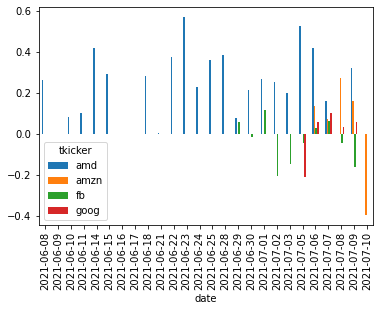

tkicker,amd,amzn,fb,goog
date,,,,
2021-06-08,0.266820,NaN,NaN,NaN
2021-06-09,0.000000,NaN,NaN,NaN
2021-06-10,0.083333,NaN,NaN,NaN
2021-06-11,0.102700,NaN,NaN,NaN
2021-06-14,0.422867,NaN,NaN,NaN


In [14]:
plt.figure(figsize =(10,8))
mean_df = df.groupby(["tkicker",'date']).mean()
mean_df = mean_df.unstack()
mean_df = mean_df.xs('compound',axis='columns').transpose()
mean_df.plot(kind="bar")
plt.show()
mean_df.head()